# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [1]:
NAME = "LEON DARIO CORREA RAMIREZ"
Student_number = "e122676"

---

# Unsupervised learning, projections

## Task 1: Read and visualize spectral data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

The data file is in text format, in which the columns are separated by tab-characters. 

The first task is to read the data file into a pandas dataframe called `D`. Use pandas function `.read_table()` for reading it.

In [3]:
# Reading the data using pandas
D = pd.read_table('liver-spectroscopy.tab', sep='\t')
D.shape

(731, 235)

In [4]:
assert(D.shape==(731,235)), "The shape of the data matrix is not quite right. Try to read it again"


Then visualize the spectral data by carrying out the following steps
1. Parse the `type` column as categorical value vector called types using function `pd.Categorical()`
1. Delete the original column 'type' from the dataframe (`del D['type']`)
1. parse the column names (`D.columns`) into a numerical vector of wavelengts, and name it as `wl`. You may find the `map()` function usefull for this purpose. Check from the last exercise how it was used. Round the wavelengths to integers, if you find a way to do that, but you can also used it as floating point values.
1. Assing the parsed `wl` vector as new column names of D (you can just assign it to `D.columns`)
1. Plot the first 10 samples. Select the first ten rows using `D.iloc[]`, and plot the transpose of them, using a transpose operator `.T`, as follows `D.iloc[].T.plot()`. Transpose is needed, because the plot function always places the row index in the x-axis. If the dataframe is first transposed, the column index (the wavelengths) becomes the row index, and plot will be correct.

You can also use `plt.xlabel()` and `plt.ylabel()` -functions to define labels for x- and y-axes.

The result should look like this:
![spectra](spectra.png)


Categories: ['collagen', 'collagen', 'collagen', 'collagen', 'collagen', ..., 'DNA', 'DNA', 'DNA', 'DNA', 'DNA']
Length: 731
Categories (4, object): ['DNA', 'collagen', 'glycogen', 'lipids']

D shape: (731, 235)
D shape after column deletion: (731, 234)

Float list first ten elements: [1801.264, 1797.407, 1793.55, 1789.693, 1785.836, 1781.979, 1778.121, 1774.264, 1770.407, 1766.55]
Integer list first ten elements: [1801, 1797, 1794, 1790, 1786, 1782, 1778, 1774, 1770, 1767]



Text(0, 0.5, 'Absorbtion/AU')

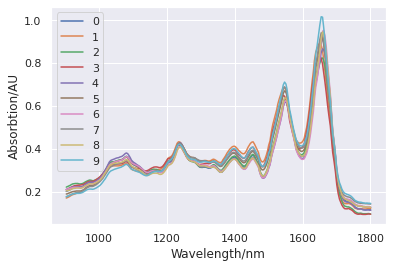

In [5]:
# Select only the last column
type_col = D.iloc[: , -1]

# Parse type column as categorical (DNA, collagen, glycogen, lipids)
types = pd.Categorical(type_col)
print("Categories:", types)
print("")

# Deletion of column 'type' from original dataset
print("D shape:", D.shape)
del D['type']
print("D shape after column deletion:", D.shape)
print("")

# Creation of wavelenght numerical vector

# Take the values of the columns of D dataframe and for each one of them convert them into float numbers and store it in a list
wl_float = list(map(float, D.columns))
print("Float list first ten elements:", wl_float[:10])
#  The float list convert it into integers and store it in a new list
wl = list(map(round, wl_float))
#wl = list(map(int, wli))

print("Integer list first ten elements:", wl[:10])
print("")

# Assign the new rounded values for D columns
D.columns = wl

# Plot the first 10 samples
D.iloc[:10].T.plot()
plt.xlabel('Wavelength/nm')
plt.ylabel('Absorbtion/AU')


In [6]:
assert(type(types)==pd.core.arrays.categorical.Categorical)
assert(len(types)==731)
assert(len(wl)==234)
assert(D.shape==(731,234))


## Task 2, calculate PCA projection and visualize

Apply PCA to the dataframe `D` and plot how much variance is explained by 10 first principal components. Store the transformed `D` as variable `projectedD`.

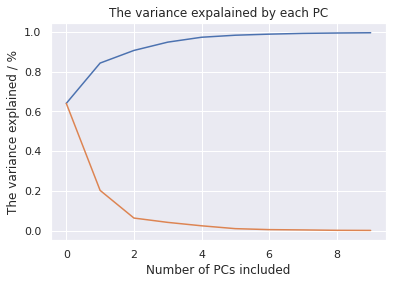

In [7]:
# PCA decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
projectedD = pca.fit_transform(D)

# Variance plot from 10 first principal components 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.title('The variance expalained by each PC')
plt.xlabel('Number of PCs included')
plt.ylabel('The variance explained / %')
print("")

In [8]:
assert(projectedD.shape==(731,10))

### Visualize the data in PCA domain

Plot a scatter plot of two first principal components. Since `projectedD` is a numpy array and not a DataFrame, use the plotting function  `plt.scatter()`. The function requires two parameters, x-data and y-data, but some others are also usefull:
1. The first parameter is the x-data, give it the first principal compoent
1. The second parameter is the y-data, give it the second principal component
1. Give the class category for point colors `c=types.codes` 
1. Use the colormap parameter to use better colormap, e.g. `cmap='rainbow'`
1. Use rather small point size e.g. `s=10`
1. Make points somewhat transparent `alpha=0.5`

You can also use `plt.xlabel()` and `plt.ylabel()` functions to provide names for x and y axes, and `plt.colorbar()` to plot the colorbar explaining the meaning of the colors.
The plot should look like the following:

![pca](pca.png)

Notice that the different tissue types are clearly different already in two dimensional space.

The Color bar represents the data categories in the values given by the line c=types.codes
essentially each categorie is tranformed into an integer value and it's given a color

Color Legend:
DNA : 0 -->represented as Purple
collagen : 1 -->represented as Cyan
glycogen : 2 -->represented as Yellow
lipids : 3 -->represented as Red


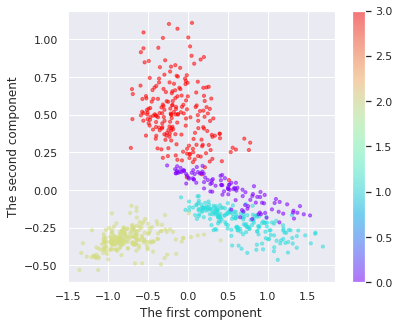

In [9]:
# Ploting of PCA projection of the two first components
plt.figure(figsize=(6,5))
plt.scatter(projectedD[:, 0], projectedD[:, 1],c=types.codes, alpha=0.5, cmap='rainbow', s=10)

plt.xlabel('The first component')
plt.ylabel('The second component')
plt.colorbar()
print("The Color bar represents the data categories in the values given by the line c=types.codes")
print("essentially each categorie is tranformed into an integer value and it's given a color\n")
print("Color Legend:")
print(types[700],":", types.codes[700], "-->represented as Purple")
print(types[100],":", types.codes[100], "-->represented as Cyan")
print(types[400],":", types.codes[400], "-->represented as Yellow")
print(types[500],":", types.codes[500], "-->represented as Red")


In [10]:
# There are some tests here. Do not remove or modify!


## Task 3, calculate t-SNE manifold projection and visualize

Repeat the previously made projection using t-SNE and visualize it. Save your t-SNE projected data as `tsneD`. You can use just two components for tSNE.

The result should look like the following: (*Notice that tSNE projection may be different, depending on program versions*)

![tsne](tsne.png)

The different cell types are even more easily separable than for PCA case.

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


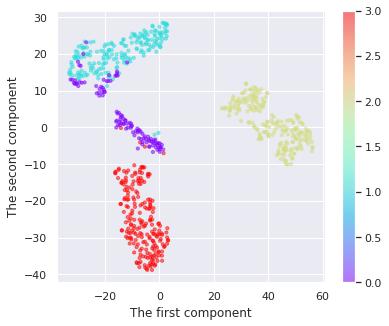

In [11]:
# t-SNE decomposition
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsneD = tsne.fit_transform(D)

# Ploting of t-SNE decomposition of the two first components
plt.figure(figsize=(6,5))
plt.scatter(tsneD[:,0], tsneD[:,1], c=types.codes, alpha=0.5, cmap='rainbow', s=10)
plt.xlabel('The first component')
plt.ylabel('The second component')
plt.colorbar()

In [12]:
assert(tsneD.shape==(731,2))

### Final questions
1. Which tissue type is the most different from the other tissue types?
1. Is it the same or different with PCA?

ANSWERS:
1. glycogen coded as number=2 (yellow color) in the plot is the most different type
2. glycogen coded as number=2 (yellow color) seems to be unrelated to all the other categories using both PCA and t-SNE projection methods, the difference however, is more evident using t-SN